Autor: <b> Grzegorz Borkowski <b>


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
dataset = pd.read_csv("results.csv", sep='|')

<h1> Wstep </h1>

Projekt przedstawia zastosowanie algorytmow ewolucyjnych do znajdowania architektur sieci neuronowych. Wyszukiwane sa sieci typu MLP (Multi-layer perceptron) do rozwiazania problemow klasyfikacji wieloklasowej.

Zastosowany algorytm ewolucyjny jest rozwiazaniem klasycznym, polegający na klonowaniu populacji rodzicow, potem zastosowanie crossover z pewnym prawdopodobienstwem dla kolejnych par genotypow. Następnie stosowana jest operacja mutacji na wszystkich genotypach, zmieniajaca kazdy bit z pewnym prawdopodobienstwem.

Każdy genotyp jednoznacznie okresla architekture sieci neuronowej. Genotypy moga miec rozna długosc (odpowiada to liczbie warstw ukrytych) oraz rozne wartosci (odpowiada to roznym nieliniowym funkcjom aktywacji, odpowiednio sigmoid i relu).

Wszystkie jednostki w danej generacji są nastepnie trenowane (okreslona parametrem liczba epok, ten sam zbior treningowy), a ich wartosc fitness to precyzja (accuracy) na zbiorze walidacyjnym. Nastepnie stosuje tzw. tournament selection (rozmiar turnieju jest hiperparametrem), aby wybrac nastepna generacje.

Sposob przeprowadzania eksperymentow jest nastepujacy. Wybierano hiperparametry z zakresu przedstawionego niżej, nastepnie dla danych hiperparametrow wyliczano najlepszego osobnika (najwyzsze accuracy) i zapisywano go. Dla danego zbioru hiperparametrow, powtarzano eksperyment pieciokrotnie.

Hiperparametry byly wybierane z zakresu:
- Mutation probability (0.0, 0.1, 0.2, 0.3, 0.4, 0.5)
- Crossover probability (0.0, 0.1, 0.2, 0.3, 0.4, 0.5)
- Population size (10, 25, 50)
- Tournament size (1, 3, 5, 7)
- Generation size (10)
- Maximum number of layers (5, 10)
- Learning rate (0.000001)
- Number of hidden units (32, 64, 100)
- Epochs (50)

Dataset na ktorym przeprowadzano eksperyment to dataset "Wine" (3 klasy, 178 probek, 13 featureow).

<h2> Rozklad wartosci funkcji fitness </h2>

count    4347.000000
mean        0.631858
std         0.066717
min         0.307692
25%         0.601399
50%         0.643357
75%         0.678322
max         0.846154
Name: best_model, dtype: float64


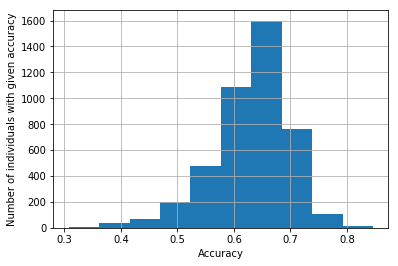

In [59]:
dataset['best_model'].hist()
print(dataset['best_model'].describe())
plt.xlabel('Accuracy')
plt.ylabel('Number of individuals with given accuracy')
plt.show()

In [60]:
largest_accuracy = dataset.nlargest(50, ['best_model'])
largest_accuracy = largest_accuracy.drop(['learning_rate', 'best_model', 'number_of_epochs', 'number_of_generations'], axis=1)

<h2> Najlepsze 50 genotypow. Histogram rozkladow hiperparametrow </h2>

2446                [1, 0, 0, 0, 0, 0]
2358             [1, 1, 0, 1, 1, 1, 0]
190                       [1, 1, 1, 1]
780                    [1, 0, 1, 0, 1]
1654                            [1, 1]
3833          [0, 0, 1, 0, 0, 1, 0, 0]
786                    [1, 0, 1, 0, 1]
1230                         [1, 1, 0]
2355    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
3073                         [1, 1, 1]
Name: best_accuracy, dtype: object


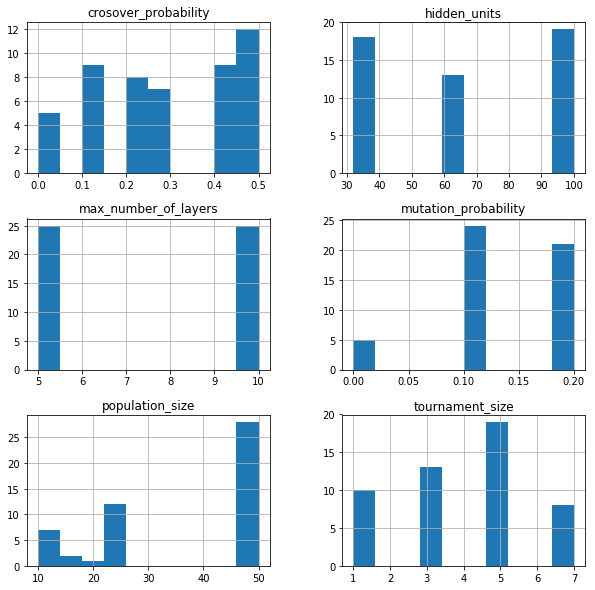

In [61]:
print (largest_accuracy['best_accuracy'][:10])
hist = largest_accuracy.hist(figsize=(10,10))
plt.show()

<h2> Najgorsze 50 genotypow. Histogram rozkladow hiperparametrow </h2>

2806                [0, 1, 1]
977        [1, 1, 1, 1, 1, 0]
2814             [1, 1, 1, 0]
2822                   [0, 1]
3563    [1, 1, 0, 1, 0, 1, 0]
92            [1, 1, 1, 0, 1]
3146       [1, 0, 1, 0, 0, 0]
3544          [0, 0, 1, 1, 1]
117                    [1, 0]
82               [0, 1, 1, 0]
Name: best_accuracy, dtype: object


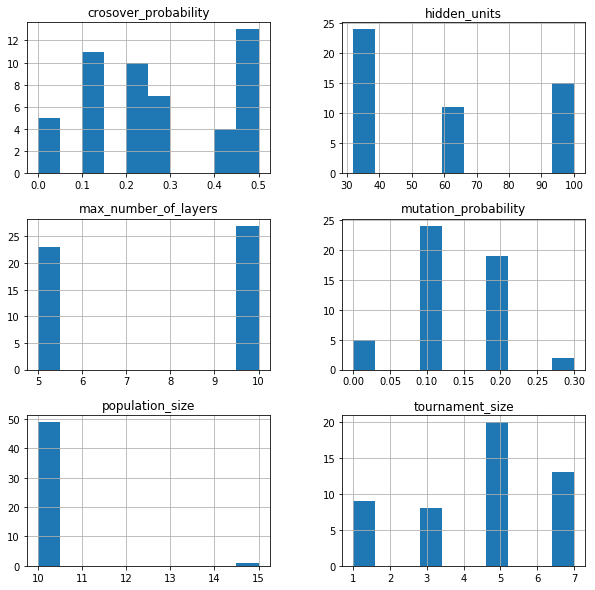

In [62]:
smallest = dataset.nsmallest(50, ['best_model'])
print (smallest['best_accuracy'][:10])
smallest = smallest.drop(['learning_rate', 'best_model', 'number_of_epochs', 'number_of_generations'], axis=1)
hist = smallest.hist(figsize=(10,10))
plt.show()

<h2> Histogramy wartosci roznych hiperparametrow </h2>

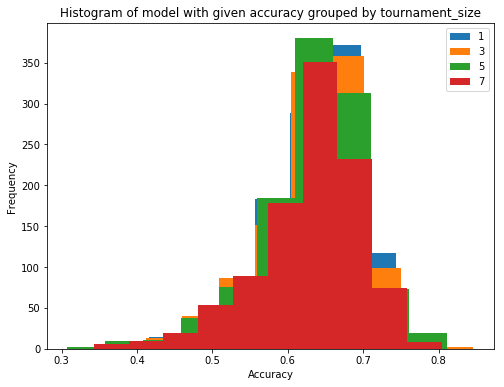

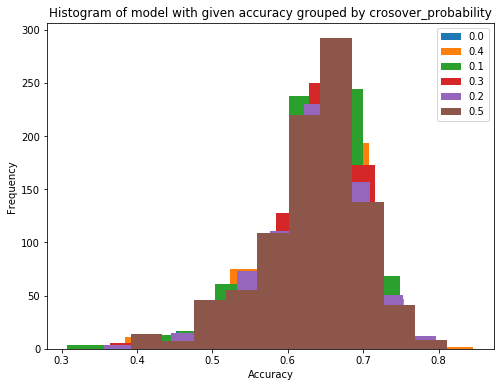

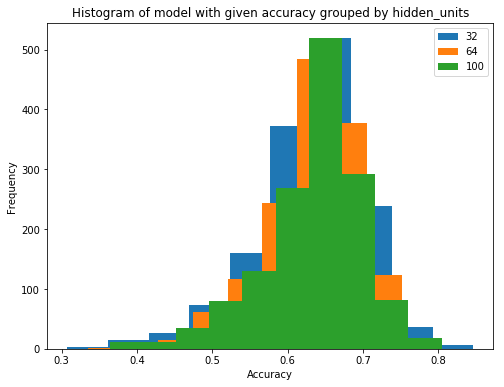

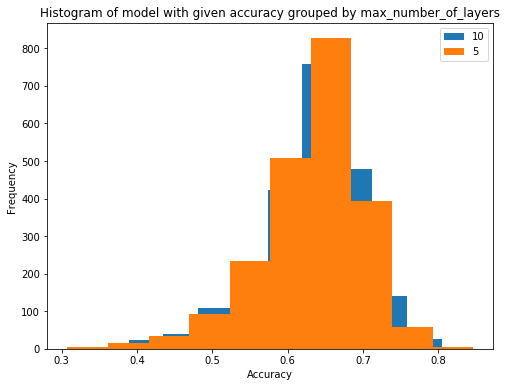

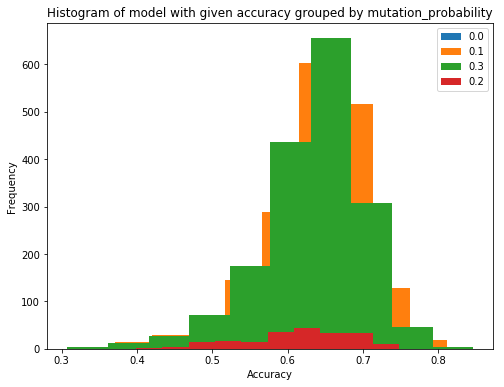

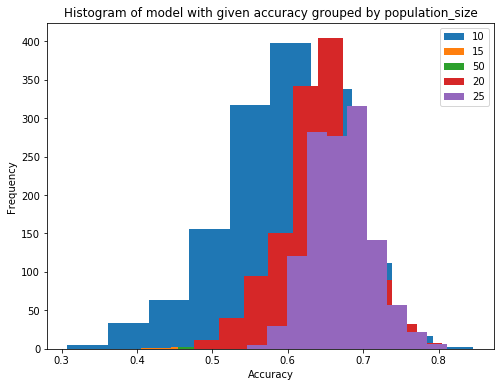

In [63]:
for group_by_columns in [['tournament_size'], ['crosover_probability'], ['hidden_units'], ['max_number_of_layers'], ['mutation_probability'], ['population_size']]:
    dataset_grouped = dataset.groupby(group_by_columns, group_keys=False)
    fig, ax = plt.subplots(figsize=(8,6))
    dataset_grouped.plot(y='best_model', kind='hist', ax=ax)
    plt.xlabel('Accuracy')
    plt.title('Histogram of model with given accuracy grouped by ' + str(group_by_columns[0]))
    plt.legend(list(set(list(dataset[group_by_columns][group_by_columns[0]]))))
    plt.show()

<h2> Macierz korelacji accuracy i hiperparametrow </h2>

In [64]:
dataset[['best_model', 'population_size', 'max_number_of_layers', 'hidden_units', 'tournament_size', 'mutation_probability', 'crosover_probability',]].corr()

,best_model,population_size,max_number_of_layers,hidden_units,tournament_size,mutation_probability,crosover_probability
best_model,1.000000,0.454021,0.024382,0.035220,-0.000597,-0.012791,0.019837
population_size,0.454021,1.000000,-0.001000,-0.001248,-0.026435,-0.026882,0.011488
max_number_of_layers,0.024382,-0.001000,1.000000,-0.000862,-0.000331,-0.000571,-0.000526
hidden_units,0.035220,-0.001248,-0.000862,1.000000,-0.000413,-0.000712,-0.000657
tournament_size,-0.000597,-0.026435,-0.000331,-0.000413,1.000000,-0.035449,-0.010733
mutation_probability,-0.012791,-0.026882,-0.000571,-0.000712,-0.035449,1.000000,0.542899
crosover_probability,0.019837,0.011488,-0.000526,-0.000657,-0.010733,0.542899,1.000000
